# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `29.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a classifier which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

## Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import json




from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.neighbors import NearestNeighbors


import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

## Load and display the data

In [3]:
#your code here
#your code here
tweetdf= pd.read_csv("Tweets.csv" )
col_names = ['level']
popular= pd.read_csv("ground_truth.csv", skiprows=0, header=None, names=col_names)
tweetdf['popularity']=popular

In [4]:
print(len(tweetdf))
print(tweetdf.columns)
print(tweetdf)
print(len(popular))
print(popular.columns)
print(popular)


11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'is_quote_status', 'retweet_count',
       'favorite_count', 'lang', 'user_name', 'user_screen_name',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_created_at', 'user_favourites_count', 'user_verified',
       'user_statuses_count', 'popularity'],
      dtype='object')
                           created_at            id        id_str  \
0      Tue Jul 31 13:34:34 +0000 2018  1.024290e+18  1.024290e+18   
1      Tue Jul 31 13:34:14 +0000 2018  1.024290e+18  1.024290e+18   
2      Tue Jul 31 13:34:40 +0000 2018  1.024290e+18  1.024290e+18   
3      Tue Jul 31 13:34:27 +0000 2018  1.024290e+18  1.024290e+18   
4      Tue Jul 31 13:34:28 +0000 2018  1.024290e+18  1.024290e+18   
...                               ...           ...           ...   
11094  Tue Jul 31 13:34:36 +0000 2018  1.024290e+18  1.024290e+18   
11095  Tue Jul 31 13:34:15 +0000

## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [ ]:
# your code here

## Part-1
*Vectorize tweets using only meta data*

In [5]:
def get_features(tweetdf):
 features_list = tweetdf[['retweet_count','is_quote_status','user_friends_count','user_statuses_count','user_followers_count']]
 return features_list



labels = tweetdf['popularity']

features_list=get_features(tweetdf)

scaledData = scale(features_list, axis=0)

trainData, testData, trainLabels, testLabels = train_test_split(scaledData, labels, test_size=0.2, random_state=1)

  # your code here

Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

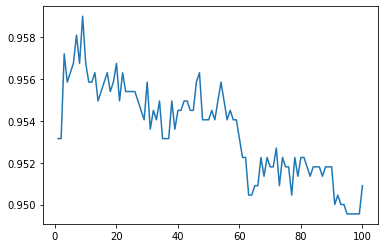

accuracy is: 95.9009009009009 %
choosen k value: 9


In [6]:
# your code here

# your code here
def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def knn_predict(X_train, X_test, y_train, y_test, k):
    predictlist = []
    
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(trainData)
    distances, indices = nbrs.kneighbors(testData)
    for i in indices:
        l=[]

        for j in i:
          l.append(trainLabels.iloc[j])
        predictionval= most_frequent(l)
        predictlist.append(predictionval)
   
    return predictlist


import matplotlib.pyplot as plt
val=0
scores = []
ks = range(1,101)
ind=5
for i in ks:
    predictVal = knn_predict(trainData, testData, trainLabels, testLabels, k=i)
    x=accuracy_score(testLabels, predictVal)
    if val<x:
      val=x
      ind=i
    scores.append(x)
plt.plot(ks, scores)
plt.show()

predictVal = knn_predict(trainData, testData, trainLabels, testLabels, k=ind)
print("accuracy is:",accuracy_score(testLabels, predictVal)*100,"%")
print("choosen k value:",ind)

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [7]:
def patternsub(text):
  text = text.lower()
  pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
  text = pattern.sub('', text)
  re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
  return text
def pooter(words,stop_words):
  PS = PorterStemmer()
  words = [PS.stem(w) for w in words if not w in stop_words]
  words = ' '.join(words)
  return words

def tweet_vectoriser(dframe):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    2. Apply TF-IDF on the tweets to extract a vector. 
    3. Perform dimensionality reduction on the obtained vector. 
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  tweetlist = list()
  
  tweet = dframe["text"].values.tolist()
  stop_words = set(stopwords.words("english"))
  stop_words.discard("not")
  tbl = str.maketrans('', '', string.punctuation)
  for text in tweet:
      text=patternsub(text)
      tokens = word_tokenize(text)
      strp = [w.translate(tbl) for w in tokens]
      words = [word for word in strp if word.isalpha()]
      
      words=pooter(words,stop_words)
      tweetlist.append(words)
  return tweetlist

tweetlist = tweet_vectoriser(tweetdf)

  # your code here

Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

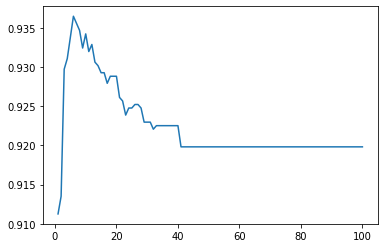

6
accuracy score is:  93.64864864864865 %
choosen k value: 6


In [11]:
# your code here
from sklearn.decomposition import PCA
TV = TfidfVectorizer()   
X = TV.fit_transform(tweetlist).toarray()
df = pd.DataFrame(X)
pca = PCA(n_components=25)
df=pca.fit_transform(df)
df = pd.DataFrame(df)
X1=df.values.tolist()
y1 = tweetdf['popularity']
from sklearn.model_selection import train_test_split
trainData1, testData1, trainLabels1, testLabels1 = train_test_split(X1, y1, test_size = 0.2, random_state = 1)

def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def knn_predict(trainData1, testData1, trainLabels1, testLabels1, k):
    predictlist = []
   
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(trainData1)
    distances, indices = nbrs.kneighbors(testData1)
    for i in indices:
        l=[]

        for j in i:
          l.append(trainLabels.iloc[j])
        predictionval= most_frequent(l)
        predictlist.append(predictionval)
   
    return predictlist


import matplotlib.pyplot as plt
val=0
scores = []
ks = range(1,101)
ind=5
for i in ks:
    predictVal = knn_predict(trainData1, testData1, trainLabels1, testLabels1, k=i)
    x=accuracy_score(testLabels1, predictVal)
    if val<x:
      val=x
      ind=i
    scores.append(x)
plt.plot(ks, scores)
plt.show()
print(ind)
predictVal = knn_predict(trainData1, testData1, trainLabels1, testLabels1, k=ind)
print("accuracy score is: ",accuracy_score(testLabels1, predictVal)*100,"%")
print("choosen k value:",ind)

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [13]:
# your code here
combine_vector = pd.concat([df,features_list], axis=1)


Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

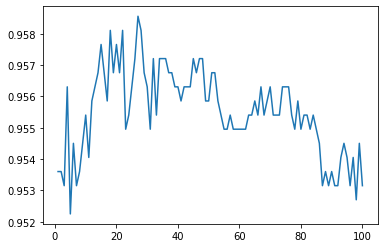

27
accuracy score is:  95.85585585585585 %
choosen k value: 27


In [14]:
# your code here
# your code hereX=
X2=combine_vector.values.tolist()
y2= tweetdf['popularity']
trainData2, testData2, trainLabels2, testLabels2 = train_test_split(X2, y2, test_size = 0.2, random_state = 1)



def most_frequent(List):
    occurence_count = Counter(List)
    return occurence_count.most_common(1)[0][0]
def knn_predict(trainData2, testData2, trainLabels2, testLabels2, k):
    predictlist = []
   
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(trainData2)
    distances, indices = nbrs.kneighbors(testData2)
    for i in indices:
        l=[]

        for j in i:
          l.append(trainLabels.iloc[j])
        predictionval= most_frequent(l)
        predictlist.append(predictionval)
   
    return predictlist

import matplotlib.pyplot as plt
val=0
scores = []
ks = range(1,101)
ind=5
for i in ks:
    predictVal2 = knn_predict(trainData2, testData2, trainLabels2, testLabels2, k=i)
    x=accuracy_score(testLabels2, predictVal2)
    if val<x:
      val=x
      ind=i
    scores.append(x)
plt.plot(ks, scores)
plt.show()
print(ind)
predictVal = knn_predict(trainData2, testData2, trainLabels2, testLabels2, k=ind)
print("accuracy score is: ",accuracy_score(testLabels2, predictVal)*100,"%")
print("choosen k value:",ind)

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

in first part we use only metadata its hugely depends on retweet count , and some other factor . as because high corelation with metadata it gives 95.9% accuracy. 
if we consider only bag of model, it will basically detect popularity based on words ,i used mindf =200, that means it consider priority of word if its minimum use is 200 times. but its not dependentd on metadata .
but popularity of tweet mainly depents on metadata like retwwet count , so accuracy becomes low.
and it could be maximize by combining it with metadata